В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

## **Завдання 1**
Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) за допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозмірний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score
from scipy.stats import probplot
from sklearn.linear_model import LinearRegression

In [2]:
medical_df = pd.read_csv('./data/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


### 1.1 Least Squares Method

In [3]:
X = non_smoker_df['age']
y = non_smoker_df['charges']

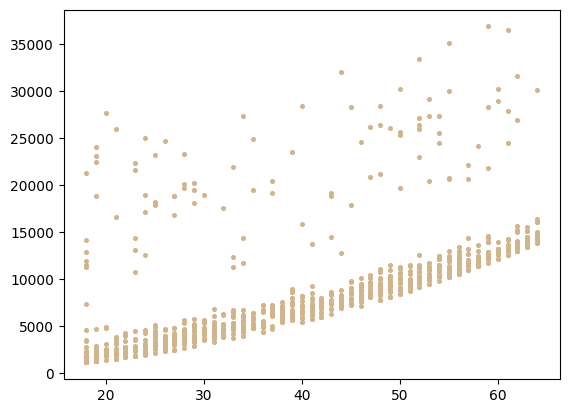

In [4]:
plt.scatter(X, y, color='tan', s=7)
plt.show()

In [5]:
def normal_equations(X, y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

Add columns with ones for bias term

In [6]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
LSM_coef = normal_equations(X_with_intercept, y)
LSM_coef

array([-2091.42055657,   267.24891283])

In [8]:
predictions_LSM = np.dot(X_with_intercept, LSM_coef)

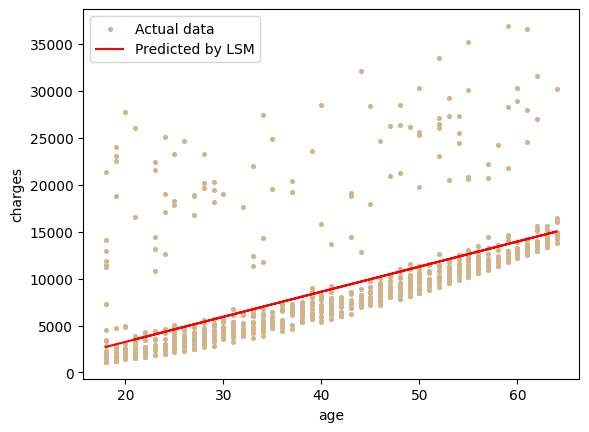

In [9]:
plt.scatter(X, y, color='tan', s=7, label='Actual data')
plt.plot(X, predictions_LSM, color='r', label='Predicted by LSM')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.show()

In [10]:
root_mean_squared_error(y, predictions_LSM)

4662.505766636395

In [11]:
r2_score(y, predictions_LSM)

0.3943171632425906

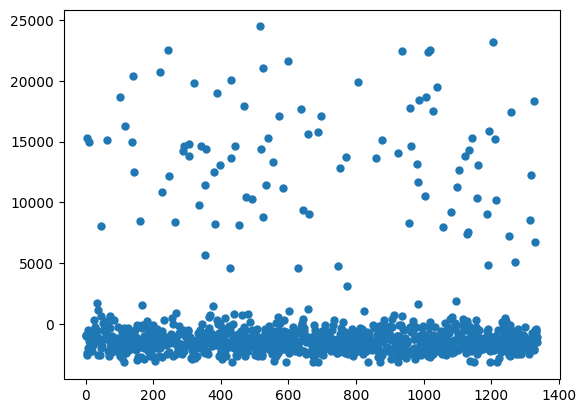

In [12]:
errors_LSM = y - predictions_LSM
plt.plot(errors_LSM, 'o', markersize=5)
plt.show()

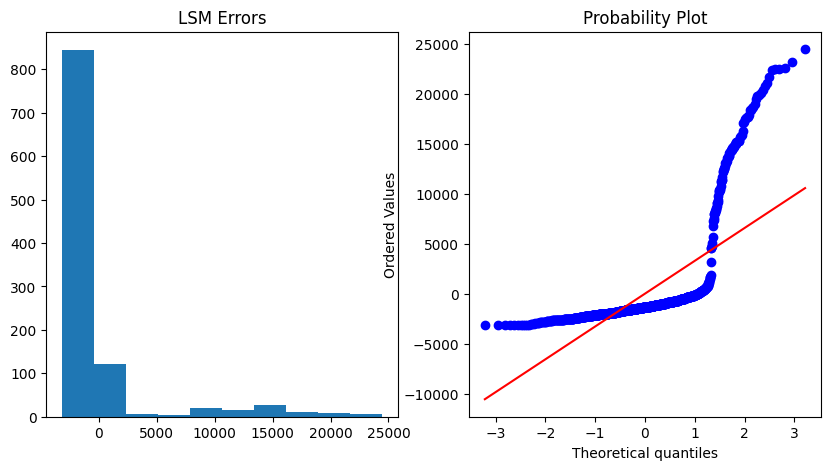

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(errors_LSM)
plt.title('LSM Errors')
plt.subplot(1, 2, 2)
probplot(errors_LSM, dist='norm', plot=plt)
plt.show()

### 1.2 Full Batch Gradient Descent

In [14]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m -= lr * m_gradient
        b -= lr * b_gradient
        if not np.isfinite(m):
            print("Gradient Descent Diverges")
            break
    return m, b, errors

lr = 0.01
Gradient Descent Diverges
inf 2.563370439276513e+302


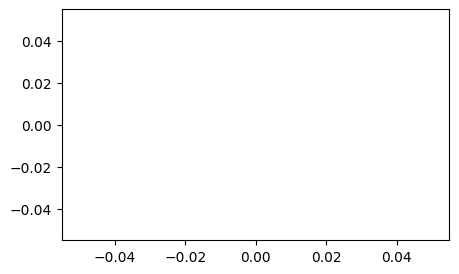

lr = 0.001
Gradient Descent Diverges
-inf -6.406869784648605e+300


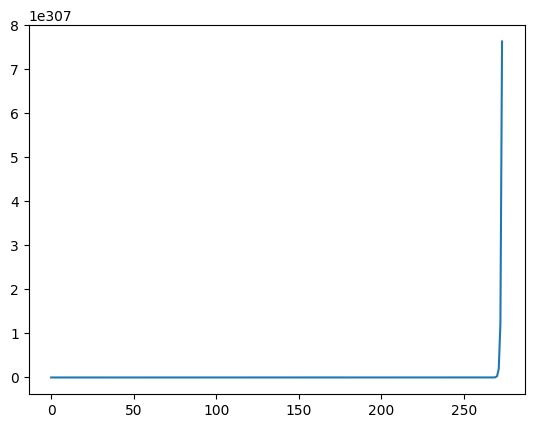

lr = 0.0005
267.0847181521504 -2084.128067164547


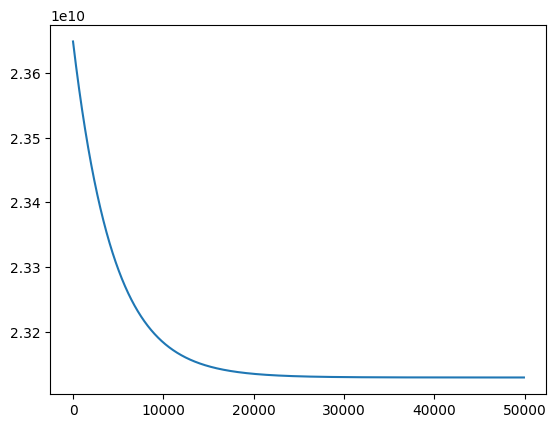

lr = 0.0003
265.6682845261523 -2021.21904195148


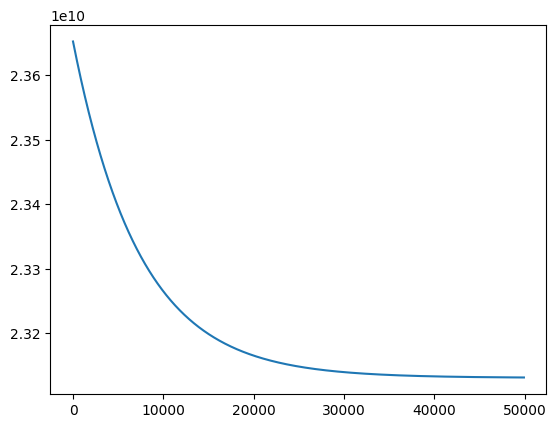

In [15]:
plt.figure(figsize=(5, 3))

for lr in [0.01, 0.001, 0.0005, 0.0003]:
    print(f"lr = {lr}")
    m, b, errors_fbgd = full_batch_gradient_descent(X, y, lr=lr, epochs=50000)
    print(m, b)
    plt.plot(errors_fbgd[100:])
    plt.show()

The optimal value for learning rate is 0.0005 and number of epochs is 50.000

In [16]:
m, b, errors_fbgd = full_batch_gradient_descent(X, y, lr=0.0005, epochs=50000)
predictions_fbgd = m * X + b

rmse_fbgd = root_mean_squared_error(y, predictions_fbgd)
r2_fbgd = r2_score(y, predictions_fbgd)
print(f"RMSE: {rmse_fbgd}")
print(f"R2: score: {r2_fbgd}")

RMSE: 4662.506412632778
R2: score: 0.39431699540625154


### 1.3 `scikit-learn.LinearRegression`

In [17]:
X = non_smoker_df[['age']]
type(X), X.shape

(pandas.core.frame.DataFrame, (1064, 1))

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [19]:
predictions_sklearn = lin_reg.predict(pd.DataFrame(X))

In [20]:
rmse_sklearn = root_mean_squared_error(y, predictions_LSM)
r2_sklearn = r2_score(y, predictions_sklearn)
print(f"RMSE: {rmse_sklearn}")
print(f"R2: score: {r2_sklearn}")

RMSE: 4662.505766636395
R2: score: 0.3943171632425906


### Conclusions

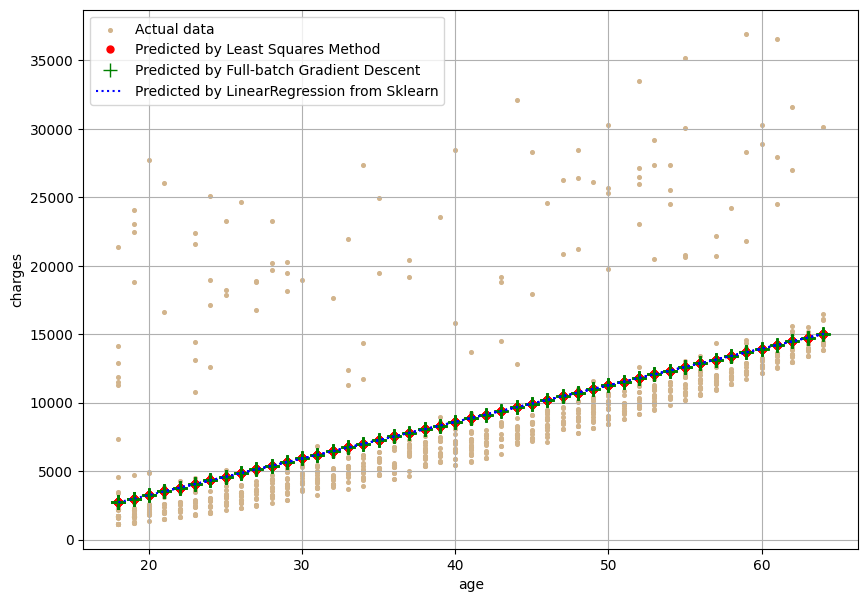

In [21]:
plt.figure(figsize=(10, 7))

plt.scatter(X, y, color='tan', s=7, label='Actual data')
plt.plot(X, predictions_LSM, 'ro', markersize=5, label='Predicted by Least Squares Method')
plt.plot(X, predictions_fbgd, 'g+', markersize=10, label='Predicted by Full-batch Gradient Descent')
plt.plot(X, predictions_sklearn, 'b:', label='Predicted by LinearRegression from Sklearn')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.grid(True)
plt.show()

The `LinearRegression` model from `sklearn` and the `Least Squares Method` produce identical results, as both solve for the optimal weights by minimizing the residual sum of squares directly.

The `Full-batch Gradient Descent` algorithm provides results very close to those obtained by the other two methods. However, it requires significantly more computation time, as it iteratively updates weights until convergence.

## **Завдання 2**
Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [22]:
smoker_df = medical_df[medical_df.smoker == 'yes']

Coefficients of model:  [305.23760211] 20294.12812691597
RMSE score: 10711.00334810241


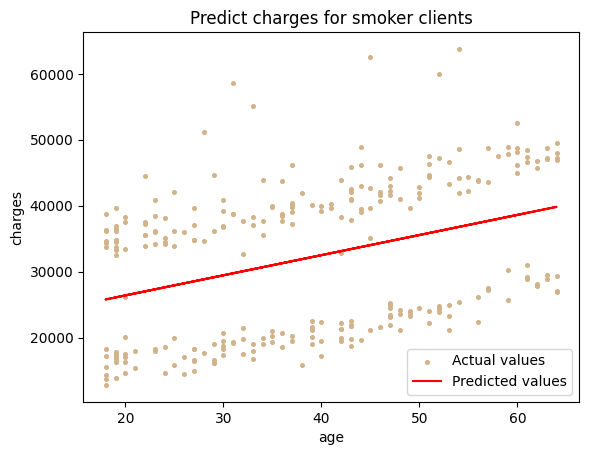

In [23]:
X = smoker_df[['age']]
y = smoker_df.charges
model = LinearRegression()
model.fit(X, y)
print("Coefficients of model: ", model.coef_, model.intercept_)

y_predict = model.predict(X)

rmse_score = root_mean_squared_error(y, y_predict)
print(f"RMSE score: {rmse_score}")

plt.scatter(X, y, color='tan', s=7, label='Actual values')
plt.plot(X, y_predict, color='r', label='Predicted values')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()
plt.title('Predict charges for smoker clients')
plt.show()

This model averages the `charges` values too much, leading to suboptimal predictions. As such, I cannot recommend its use in production.

A simple and more effective approach would be to split the data into two distinct groups (as we can see in the plot) and train a separate model for each group. While this method may not yield the most accurate predictions, it would provide significantly better results compared to using a single model for the entire dataset of smoker clients.